In [2]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [ ]:
X_test, y_test = joblib.load(r"D:\Projects_25\Sentiment_analysis\senti\Datasets\Split_Datasets\arabic_test.pkl")
X_test = list(map(str, X_test))  


In [6]:
model_lr = joblib.load("D:\Projects_25\Sentiment_analysis\senti\Models\logistic_model_arabic.pkl") 
model_nb = joblib.load(r"D:\Projects_25\Sentiment_analysis\senti\Models\naive_bayes_model_arabic.pkl")
vectorizer = joblib.load(r"D:\Projects_25\Sentiment_analysis\senti\Models\tfidf_vectorizer_arabic.pkl")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\fateh\AppData\Local\Temp\ipykernel_7548\3389303093.py:1: SyntaxWarning: invalid escape sequence '\P'
  model_lr = joblib.load("D:\Projects_25\Sentiment_analysis\senti\Models\logistic_model_arabic.pkl")


In [7]:
X_test_vect = vectorizer.transform(X_test)

y_pred_lr = model_lr.predict(X_test_vect)

y_pred_nb = model_nb.predict(X_test_vect)

In [8]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"THe Accuracy of Logistic Regression Model is: {acc_lr*100}% \n")

print("The Classification Report for Logistic Regression Model is \n")
print(classification_report(y_test, y_pred_lr, target_names=["Negative", "positive"]))

print(f"THe Accuracy of Naive Bayes Model is: {acc_nb*100}% \n")

print("The Classification Report for Naive Bayes Model is \n")
print(classification_report(y_test, y_pred_nb, target_names=["Negative", "positive"]))



THe Accuracy of Logistic Regression Model is: 85.44322783860807% 

The Classification Report for Logistic Regression Model is 

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85      6677
    positive       0.85      0.86      0.86      6657

    accuracy                           0.85     13334
   macro avg       0.85      0.85      0.85     13334
weighted avg       0.85      0.85      0.85     13334

THe Accuracy of Naive Bayes Model is: 83.50082495875206% 

The Classification Report for Naive Bayes Model is 

              precision    recall  f1-score   support

    Negative       0.81      0.88      0.84      6677
    positive       0.87      0.79      0.83      6657

    accuracy                           0.84     13334
   macro avg       0.84      0.83      0.83     13334
weighted avg       0.84      0.84      0.83     13334



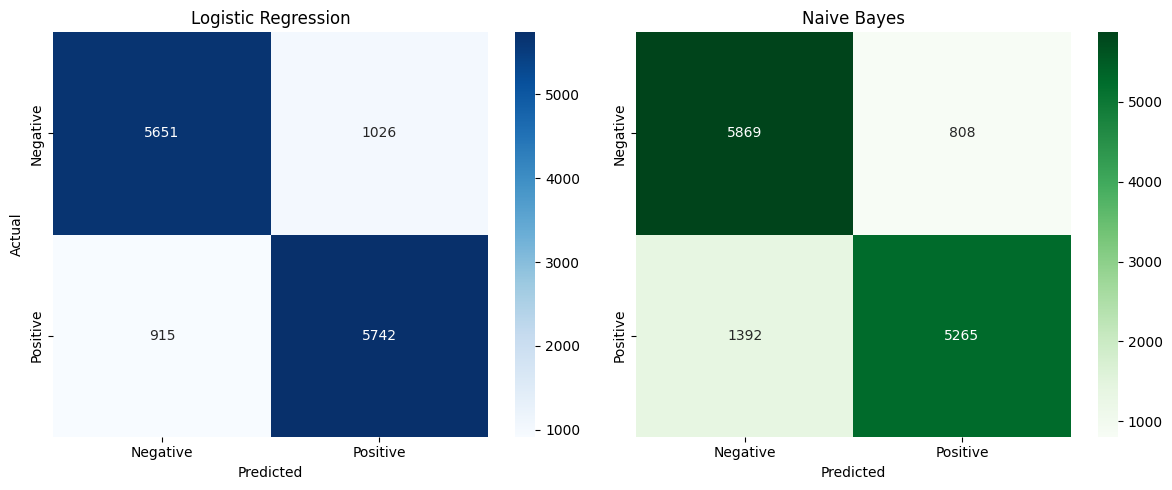

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Naive Bayes Confusion Matrix
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'],
            ax=axes[1])
axes[1].set_title("Naive Bayes")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()
